# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Buriola

Student name: Lorenzo
    
ID: 2021860

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
seed = 16
np.random.seed(seed)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 46 54 69 55 65 56 62 59 79]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


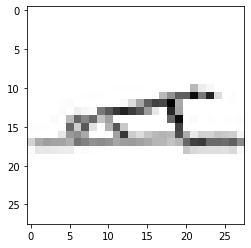

LABEL: 5
INPUT:


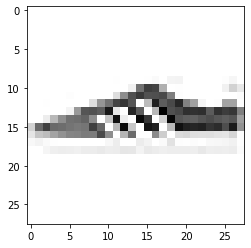

LABEL: 7
INPUT:


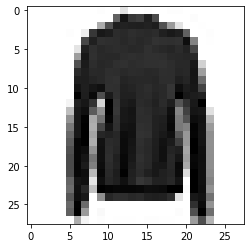

LABEL: 2
INPUT:


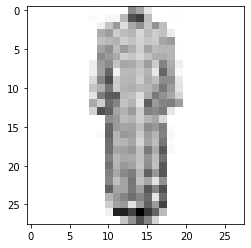

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1., 10, 100]}

#train linear SVM

svm_class = SVC(kernel = 'linear')
cross_val = GridSearchCV(svm_class, parameters, cv = 4)
cross_val.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

print("\nAll scores on the grid:")
tab = pd.DataFrame(cross_val.cv_results_)
tab.iloc[:, 4:]

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 0.1}

Score with best parameters:
0.8083333333333333

All scores on the grid:


,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001,{'C': 0.001},0.586667,0.620000,0.600000,0.606667,0.603333,0.012019,6
1,0.01,{'C': 0.01},0.800000,0.793333,0.786667,0.746667,0.781667,0.020750,5
2,0.1,{'C': 0.1},0.833333,0.793333,0.800000,0.806667,0.808333,0.015184,1
3,1,{'C': 1.0},0.806667,0.806667,0.820000,0.800000,0.808333,0.007265,1
4,10,{'C': 10},0.806667,0.806667,0.820000,0.800000,0.808333,0.007265,1
5,100,{'C': 100},0.806667,0.806667,0.820000,0.800000,0.808333,0.007265,1


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5.],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

svm_class = SVC(kernel = 'poly', degree = 2)
cross_val = GridSearchCV(svm_class, parameters, cv = 4)
cross_val.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

print("\nAll scores on the grid:")
tab = pd.DataFrame(cross_val.cv_results_)
tab.iloc[:, 4:]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 0.5, 'gamma': 0.05}

Score with best parameters:
0.7883333333333333

All scores on the grid:


,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.05,0.05,"{'C': 0.05, 'gamma': 0.05}",0.793333,0.726667,0.753333,0.726667,0.750000,0.027285,9
1,0.05,0.5,"{'C': 0.05, 'gamma': 0.5}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2
2,0.05,5,"{'C': 0.05, 'gamma': 5.0}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2
3,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.806667,0.793333,0.773333,0.780000,0.788333,0.012802,1
4,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2
5,0.5,5,"{'C': 0.5, 'gamma': 5.0}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2
6,5,0.05,"{'C': 5.0, 'gamma': 0.05}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2
7,5,0.5,"{'C': 5.0, 'gamma': 0.5}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2
8,5,5,"{'C': 5.0, 'gamma': 5.0}",0.806667,0.766667,0.780000,0.793333,0.786667,0.014907,2


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

svm_class = SVC(kernel = 'poly', degree = degree)
cross_val = GridSearchCV(svm_class, parameters, cv = 4)
cross_val.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

print("\nAll scores on the grid:")
tab = pd.DataFrame(cross_val.cv_results_)
tab.iloc[:, 4:]

RESULTS FOR POLY DEGREE= 4  KERNEL

Best parameters set found:
{'C': 0.05, 'gamma': 0.5}

Score with best parameters:
0.7466666666666667

All scores on the grid:


,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.05,0.05,"{'C': 0.05, 'gamma': 0.05}",0.746667,0.760000,0.726667,0.740000,0.743333,0.012019,8
1,0.05,0.5,"{'C': 0.05, 'gamma': 0.5}",0.760000,0.766667,0.706667,0.753333,0.746667,0.023570,1
2,0.05,5,"{'C': 0.05, 'gamma': 5.0}",0.760000,0.766667,0.706667,0.753333,0.746667,0.023570,1
3,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.733333,0.753333,0.700000,0.746667,0.733333,0.020548,9
4,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.760000,0.766667,0.706667,0.753333,0.746667,0.023570,1
5,0.5,5,"{'C': 0.5, 'gamma': 5.0}",0.760000,0.766667,0.706667,0.753333,0.746667,0.023570,1
6,5,0.05,"{'C': 5, 'gamma': 0.05}",0.753333,0.766667,0.706667,0.753333,0.745000,0.022791,7
7,5,0.5,"{'C': 5, 'gamma': 0.5}",0.760000,0.766667,0.706667,0.753333,0.746667,0.023570,1
8,5,5,"{'C': 5, 'gamma': 5.0}",0.760000,0.766667,0.706667,0.753333,0.746667,0.023570,1


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svm_class = SVC(kernel = 'rbf')
cross_val = GridSearchCV(svm_class, parameters, cv = 4)
cross_val.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("\nBest parameters set found:")
print(cross_val.best_params_)

print("\nScore with best parameters:")
print(cross_val.best_score_)

print("\nAll scores on the grid:")
tab = pd.DataFrame(cross_val.cv_results_)
tab.iloc[:, 4:]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 5, 'gamma': 0.005}

Score with best parameters:
0.8133333333333334

All scores on the grid:


,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.5,0.005,"{'C': 0.5, 'gamma': 0.005}",0.746667,0.746667,0.753333,0.740000,0.746667,0.004714,7
1,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.733333,0.760000,0.726667,0.720000,0.735000,0.015184,8
2,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.133333,0.133333,0.126667,0.133333,0.131667,0.002887,9
3,0.5,5,"{'C': 0.5, 'gamma': 5}",0.133333,0.133333,0.126667,0.133333,0.131667,0.002887,9
4,5,0.005,"{'C': 5, 'gamma': 0.005}",0.846667,0.820000,0.793333,0.793333,0.813333,0.022111,1
5,5,0.05,"{'C': 5, 'gamma': 0.05}",0.806667,0.780000,0.780000,0.806667,0.793333,0.013333,4
6,5,0.5,"{'C': 5, 'gamma': 0.5}",0.133333,0.133333,0.126667,0.133333,0.131667,0.002887,9
7,5,5,"{'C': 5, 'gamma': 5}",0.133333,0.133333,0.126667,0.133333,0.131667,0.002887,9
8,50,0.005,"{'C': 50, 'gamma': 0.005}",0.840000,0.800000,0.800000,0.800000,0.810000,0.017321,2
9,50,0.05,"{'C': 50, 'gamma': 0.05}",0.806667,0.780000,0.780000,0.806667,0.793333,0.013333,4


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

Linear and 2 degrees polynomial kernels has similar performances. For the 4 degrees polynomial kernel the test accuracy is 0.75, which is a bit worse. The RBF kernel performs slightly better with a test accuracy that is 0.81. Looking at the scores grids it can be seen that there are usually many different choices of parameters C and gamma that bring to optimal results.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = 'rbf', C = 5, gamma=0.005)

best_SVM.fit(X_train, y_train)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.048333
Best SVM test error: 0.193000


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1-train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1-test_error))
    
    plt.show()

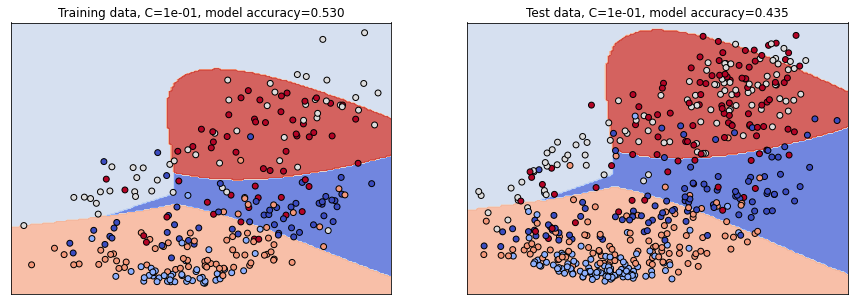

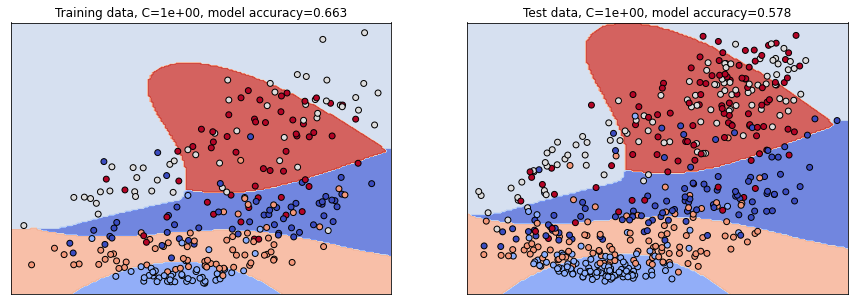

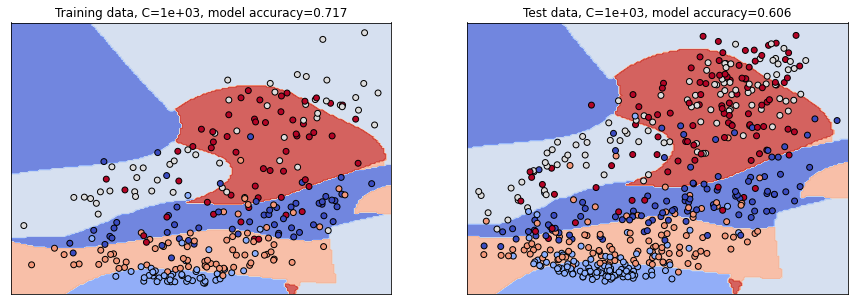

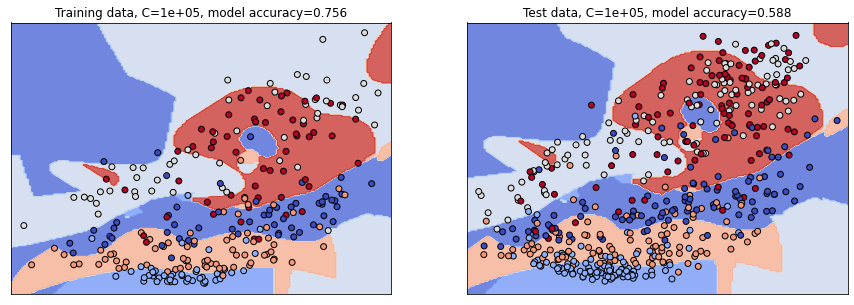

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(kernel = 'rbf', C=C, gamma=gamma)
    
    my_svm.fit(X_train_pca, y_train_plot)
    train_error = 1-my_svm.score(X_train_pca, y_train_plot)
    test_error = 1-my_svm.score(X_test_pca, y_test_plot)
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

The bigger the parameter C becomes, the smaller the trainig error is (the biggest the training accuracy). This is due to the fact that the algorithm becomes less and less regularized, the shape of the boundaries becomes more and more irregular adapting to the training data and increasing the "complexity" of the solution. Anyway this procedure can lead to an overfit. In fact the test accuracy is not always increasing (between this range it remains quite constant). We expect that keep increasing C the test accuracy starts going worse. 

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [1]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
for gamma in gamma_values:
    my_svm = SVC(kernel = 'rbf', C = 1, gamma=gamma)
    my_svm.fit(X_train, y_train)
    train_acc_list.append(1-my_svm.score(X_train, y_train))
    test_acc_list.append(1-my_svm.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train error')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test error')
ax[1].grid(True)


plt.show()

NameError: name 'gamma_values' is not defined

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Increasing the value of gamma the training error becomes smaller and smaller (in this case it reaches 0). Nevertheless this does not happen for the test error. It decreases unless gamma reaches the value $10^{-2}$ and then it starts increasing. The model improves its performances until gamma < $10^{-2}$, but after that it starts overfitting the data. A big gamma parameter means a small sigma parameter in the gaussian kernel. The boundary regions are controlled by this parameter and when gamma becomes too big they are concentrated only around the training data raising the risk of overfitting and bad classification of the test set. In this case the best gamma is $10^{-2}$

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [155 139 139 161 154 160 138 121 163 170]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel = 'rbf', C = 5, gamma=0.005)

best_SVM.fit(X_train, y_train)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.060667
Best SVM test error: 0.168974


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

log_class = linear_model.LogisticRegression(C=1e5, max_iter=600) #I have changed the max_iter to avoid the production of a Warning
log_class.fit(X_train, y_train)

training_error = 1 - log_class.score(X_train, y_train)
test_error = 1 - log_class.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.211521


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
log_class = linear_model.LogisticRegression(C=1, max_iter=600)
log_class.fit(X_train, y_train)

training_error = 1 - log_class.score(X_train, y_train)
test_error = 1 - log_class.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.006000
Best regularized logistic regression test error: 0.189487


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

Using 1500 samples in the training set the performances of the algorithm improve. While the training error slightly increases the test error decreases as we expected (we used more data to train the SVM). The Logistic Regression with 1500 samples has worse results than the SVM but the test error decreases if we use regularization (as we espected from the theory). Moreover using regularization the training error increases from 0 to 0.006.  

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [21]:
LR_prediction = log_class.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

INPUT:


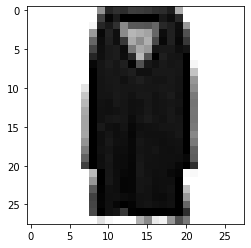

LABEL: 3
LR prediction:  0
SVM prediction:  3


In [22]:
index = 0

for i in range(len(LR_prediction)):
    if LR_prediction[i] != SVM_prediction[i]:
        if SVM_prediction[i] == y_test[i]:
            index = i
            break

plot_input(X_test,y_test,index)

print("LR prediction: ", LR_prediction[index])
print("SVM prediction: ", SVM_prediction[index])

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
conf_SVM_norm = confusion_SVM /counts[:,None]
print("\n Confusion matrix SVM (normalized)   \n \n",  conf_SVM_norm)

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
conf_LR_norm = confusion_LR/counts[:,None]
print("\n Confusion matrix LR (normalized)   \n \n", conf_LR_norm)

Labels and frequencies in test set:  [5845 5861 5861 5839 5846 5840 5862 5879 5837 5830]

 Confusion matrix SVM  
 
 [[5028   17  137  277   22   11  287    0   64    2]
 [  41 5504  122  168   10    1   13    0    1    1]
 [ 103    4 4304   58  806    8  534    0   43    1]
 [ 318   60   44 5094  183    0  121    0   19    0]
 [  29    5  469  367 4296    5  643    0   31    1]
 [   3    0    0    4    0 5279    2  347   37  168]
 [1385   15  768  209  472    5 2903    0  103    2]
 [   0    0    0    0    0  265    0 5275   10  329]
 [  21    5  120   89   19   50   75   24 5428    6]
 [   1    0    0    3    1   93    0  227    1 5504]]

 Confusion matrix SVM (normalized)   
 
 [[0.86 0.   0.02 0.05 0.   0.   0.05 0.   0.01 0.  ]
 [0.01 0.94 0.02 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.73 0.01 0.14 0.   0.09 0.   0.01 0.  ]
 [0.05 0.01 0.01 0.87 0.03 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.08 0.06 0.73 0.   0.11 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.9  0.   0.06 0.0

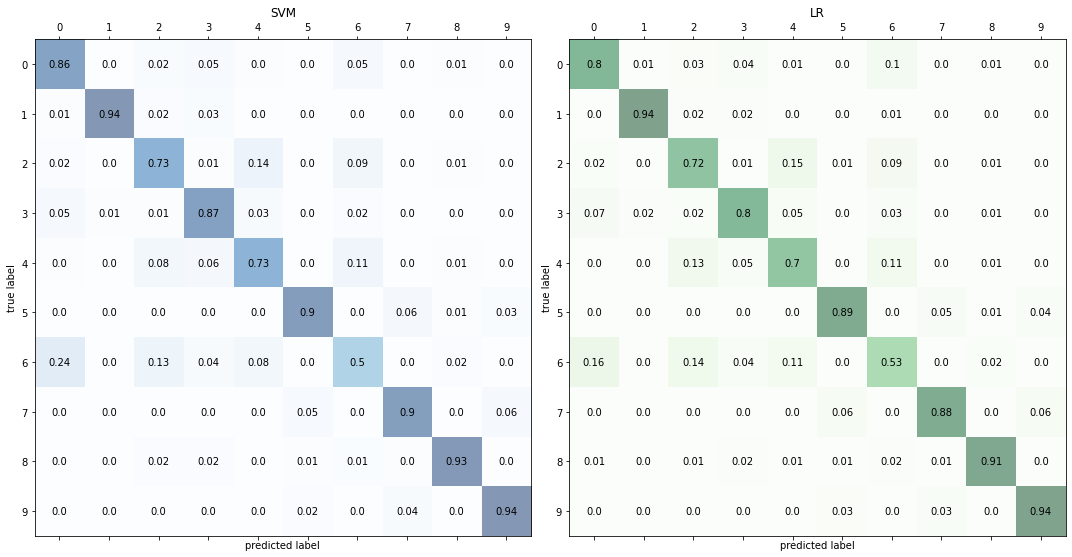

In [24]:
#Better visualization of confusion matrices
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15, 8))
ax1.matshow(conf_SVM_norm, cmap = plt.cm.Blues, alpha = 0.5)
ax1.set_xticks(np.arange(10))
ax1.set_yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        ax1.text(x=j, y=i, s=round(conf_SVM_norm[i, j],2), ha="center", va="center")
ax1.set_xlabel('predicted label')
ax1.set_ylabel('true label')
ax1.set_title('SVM')
ax2.matshow(conf_LR_norm, cmap = plt.cm.Greens, alpha = 0.5)
ax2.set_xticks(np.arange(10))
ax2.set_yticks(np.arange(10))
for i in range(conf_SVM_norm.shape[0]):
    for j in range(conf_SVM_norm.shape[1]):
        ax2.text(x=j, y=i, s=round(conf_LR_norm[i, j],2), va = 'center', ha = 'center')
ax2.set_xlabel('predicted label')
ax2.set_ylabel('true label')
ax2.set_title('LR')
fig.tight_layout()
plt.show()

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

Just for remember, the dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

For most of the classes the accuracy is quite good. Trousers (1), Sandals(5), Sneakers (7), Bags(8) and Ankle Boots (9) have an accuracy value that is similar or more than 0.9. They are classified pretty well. Note how sandals, sneakers and boots are sometimes confused between each other. For T-shirts(0), Pullovers(2), Dresses(3) and Coats(4) the accuracy is between 0.7 and 0.9, so it is acceptable. This types of clothes are often confused among each other and with Shirts(6): the 10% (SVM) of t-shirts are calssified as shirts or dresses, more than the 10% of pullovers are classified as coats. Some dresses are classified as t-shirts, while coats are sometimes confused as pullover or shirts. For shirts(6) the accuracy is not so good (0.5 SVM, 0.53 LR). Many of them are misclassified as T-shirts, pullovers or coats.
It seems that clothes with a very specific shape (like trousers and bags) are classified well, while clothes with similar shapes (like t-shirts and shirts) are sometimes miscalssified among each other, decreasing the accuracy of the algorithms.
SVM and LR have similar values of accuracies classifying this dataset.